# Upper Confidence Bound(UCB)

## Data Preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [7]:
import math

# UCB 1단계: 사용자 수(round)와 광고 수를 담는 변수 필요.
# 또한, 각 광고마다 클릭된 총 횟수를 담는 변수와 보상 횟수를 담는 변수 필요.

N = len(df)
d = len(df.iloc[0])
ads_selected = [] # round에서 선택된 광고의 전체 목록을 가지는 변수
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0 # round를 지나며 축적된 총 보상 변
for n in range(0, N):
    ad = 0
    max_upper_bound = 0 # 최대 UCB 비교를 위한 변수, 초기에는 최대 UCB 0.
    # 0보단 큰 UCB를 갖는 광고가 생기면 값을 교체할 것 
    
    for i in range(0, d):
        if numbers_of_selections[i] > 0: # i의 광고가 선택되었는지 확인
            # UCB 2-1단계: 광고 i가 n round까지 만든 보상의 평균 계산
            average_reward = sums_of_rewards[i] / numbers_of_selections[i] 
            # UCB 2-2단계: 광고 i가 n round까지 거쳐서 나온 신뢰 구간(값) 계산
            delta_i = math.sqrt(3/2 * math.log(n+1) / numbers_of_selections[i])
            # UCB 2-3단계: 상계(upper bound) 계산
            upper_bound = average_reward + delta_i
        else:
           upper_bound = 1e400 # 무한대(almost)
            
        # UCB 3단계: 최대 UCB 광고를 선택하는 코드 추가
        if max_upper_bound < upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = df.values[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

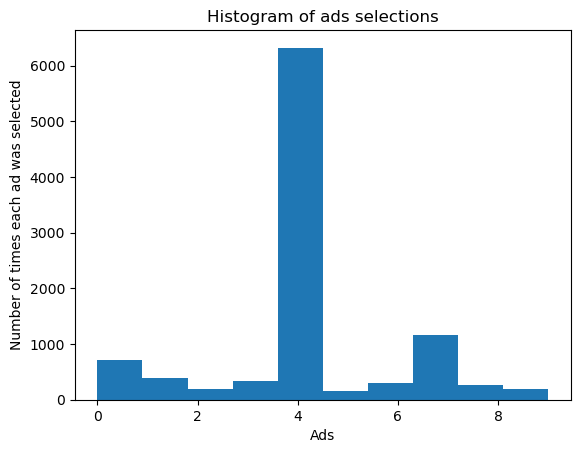

In [9]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

UCB 알고리즘으로 최상의 광고를 찾아낼 수 있었다.
10000 라운드로 위와 같은 결과를 낼 수 있었지만, 만약 500 라운드인 경우에는 충분하지 않다.

## 이해 못 해서 적어보는 UCB 알고리즘 요약

각 행에 대해 가장 높은 UCB 값을 가진 광고 하나를 선택하여, 그 광고에 대한 보상을 얻고 통계를 업데이트 하는 과정이다.

각 행(사용자)을 순회하면서 사용자의 광고 클릭 여부를 검사한다.

`upper_bound` 변수는 값 광고의 UCB 값을 저장하는 변수로, `max_upper_bound` 보다 높은 UCB 값이 나오면 `max_upper_bound` 변수를 해당 UCB 값으로 대체한다.

가장 높은 UCB 값을 가지는 광고를 `ads_selected` 변수에 append하여 저장하고, 이를 모아 histogram으로 나타낸다.

이에 대한 통계를 histogram으로 나타내어 가장 높은 클릭률을 가지는 광고를 판별할 수 있다.